## **DLCV Assignment #1** 
### Team Members : Nadeen Ahmad 37-4023 - Malak ElShenawy 37-0730 
### Group D:
### 4023 + 730 = 4753  --> Odd number 
### Question #1:
#### Group D: im1, im2, im5, im8


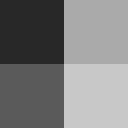

In [1]:
## Creating Image #1 No Noise
import numpy as np
from PIL import Image
img1 = np.zeros((512, 512))
for i in range(0,512):
    for j in range(0,512):
        if(i <256 and j < 256):
            img1[i][j] = 40
        elif (i< 256 and j > 255):
            img1[i][j] = 170
        elif (i> 255 and j < 256):
            img1[i][j] = 90
        else:
            img1[i][j] = 200

image1 = Image.fromarray(img1)
image1 = image1.convert('RGB')
image1.save('im1.tif')
display(image1.resize((128,128)))

In [0]:
# Creating image#2 basic salt & pepper noise
def saltAndPepperNoise(X_imgs, amount):
    # Need to produce a copy as to not modify the original image
    X_imgs_copy = X_imgs.copy()
    row, col = X_imgs_copy.shape
    salt_vs_pepper = 0.2
    num_salt = np.ceil(amount * X_imgs_copy.size * salt_vs_pepper)
    num_pepper = np.ceil(amount * X_imgs_copy.size * (1.0 - salt_vs_pepper))
    # Add Salt noise
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in X_imgs_copy.shape]
    X_imgs_copy[coords[0], coords[1]] = 200
    # Add Pepper noise
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in X_imgs_copy.shape]
    X_imgs_copy[coords[0], coords[1]] = 40
    #add 100
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in X_imgs_copy.shape]
    X_imgs_copy[coords[0], coords[1]] = 90
    #add 200
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in X_imgs_copy.shape]
    X_imgs_copy[coords[0], coords[1]] = 170
    return X_imgs_copy
  

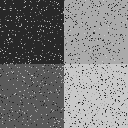

In [3]:
image2 = saltAndPepperNoise(img1, 0.05)
image2 = Image.fromarray(image2)
image2 = image2.convert('RGB')
image2.save("im2.tif")
display(image2.resize((128,128)))

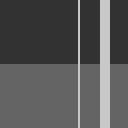

In [4]:
# Creating Image 5 where the upper half has the same grey level and the lower half has the same grey level
# 2 columns with different widths have brighter grey levels 
image5 = np.zeros((512, 512))
for i in range(0,512):
    for j in range(0,512):
        if(i <256):
            image5[i][j] = 50
        else:
            image5[i][j] = 100
        if(j>310 and j<320):
            image5[i][j] = 200
        if(j>400 and j<440):
            image5[i][j] = 200

img5  = Image.fromarray(image5)
img5 = img5.convert('RGB')
img5.save("im5.tif")
display(img5.resize((128,128)))

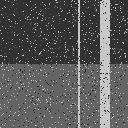

In [5]:
#Creating Image 8 which is some random salt & pepper noise added to image 5
image8 = saltAndPepperNoise(image5, 0.05)
image8 = Image.fromarray(image8)
image8 = image8.convert('RGB')

image8.save("im8.tif")
display(image8.resize((128,128)))

### Question #2
####  Implement the K-means algorithm.

In [0]:
from PIL import Image, ImageStat
import numpy
def converged(centroids, old_centroids):
	if len(old_centroids) == 0:
		return False
	if len(centroids) <= 5:
		a = 1
	elif len(centroids) <= 10:
		a = 2
	else:
		a = 4
	for i in range(0, len(centroids)):
		cent = centroids[i]
		old_cent = old_centroids[i]
		if ((int(old_cent[0]) - a) <= cent[0] <= (int(old_cent[0]) + a)) and ((int(old_cent[1]) - a) <= cent[1] <= (int(old_cent[1]) + a)) and ((int(old_cent[2]) - a) <= cent[2] <= (int(old_cent[2]) + a)):
			continue
		else:
			return False
	return True

def getMin(pixel, centroids):
	minDist = 9999
	minIndex = 0
	for i in range(0, len(centroids)):
		d = numpy.sqrt(int((centroids[i][0] - pixel[0]))**2 + int((centroids[i][1] - pixel[1]))**2 + int((centroids[i][2] - pixel[2]))**2)
		if d < minDist:
			minDist = d
			minIndex = i
	return minIndex

def assignPixels(centroids):
	clusters = {}
	for x in range(0, img_width):
		for y in range(0, img_height):
			p = px[x, y]
			minIndex = getMin(px[x, y], centroids)
			try:
				clusters[minIndex].append(p)
			except KeyError:
				clusters[minIndex] = [p]
	return clusters

def adjustCentroids(centroids, clusters):
	new_centroids = []
	keys = sorted(clusters.keys())
	for k in keys:
		n = numpy.mean(clusters[k], axis=0)
		new = (int(n[0]), int(n[1]), int(n[2]))
		#print(str(k) + ": " + str(new))
		new_centroids.append(new)
	return new_centroids

def startKmeans(someK):
	centroids = []
	old_centroids = []
	rgb_range = ImageStat.Stat(im).extrema
	i = 1
	#Initializes someK number of centroids for the clustering
	for k in range(0, someK):
		cent = px[numpy.random.randint(0, img_width), numpy.random.randint(0, img_height)]
		centroids.append(cent)
	print("create centroids , classifying pixels ")
	while not converged(centroids, old_centroids) and i <= 20:
		i += 1
		old_centroids = centroids 								#Make the current centroids into the old centroids
		clusters = assignPixels(centroids) 						#Assign each pixel in the image to their respective centroids
		centroids = adjustCentroids(old_centroids, clusters) 	#Adjust the centroids to the center of their assigned pixels
	print("converged")
	print(centroids)
	return centroids

def drawWindow(result, path):
	img = Image.new('RGB', (img_width, img_height), "white")
	p = img.load()
	for x in range(img.size[0]):
		for y in range(img.size[1]):
			RGB_value = result[getMin(px[x, y], result)]
			p[x, y] = RGB_value
	img.show()
	img.save(path)
	display(img.resize((128,128)))

In [0]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

In [0]:
#confusion matrix
from sklearn.metrics import confusion_matrix
def conf_matrix(path1, path2):
    original = path1
    original2 = Image.open(original)
    original2= np.array(original2)
    original2 = original2.flatten()
    original2.shape
    kMeans = path2
    kMeans2 = Image.open(kMeans)
    kMeans2= np.array(kMeans2)
    kMeans2 = kMeans2.flatten()
    kMeans2.shape
    c1 = confusion_matrix(original2, kMeans2)
    print(c1)
    print("Accuracy of KMeans Segmentation Image1: ",round(accuracy(c1)*100, 2) ,"%" )

####  Apply the K-means algorithm on the created test images and compute the overall accuracy. Report the results in a confusion matrix for each image. 

(512, 512)
create centroids , classifying pixels 
converged
[(170, 170, 170), (40, 40, 40), (90, 90, 90), (200, 200, 200)]


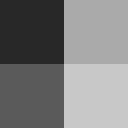

In [10]:
k_input = 4
img = "/content/im1.tif"
im = Image.open(img)
print(im.size)
img_width, img_height = im.size
px = im.load()
result = startKmeans(k_input)
drawWindow(result,"/content/im1KMEANS.tif" )

In [11]:
conf_matrix("/content/im1.tif", "/content/im1KMEANS.tif")

[[196608      0      0      0]
 [     0 196608      0      0]
 [     0      0 196608      0]
 [     0      0      0 196608]]
Accuracy of KMeans Segmentation Image1:  100.0 %


create centroids , classifying pixels 
converged
[(170, 170, 170), (200, 200, 200), (40, 40, 40), (90, 90, 90)]


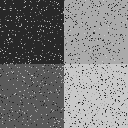

[[201069      0      0      0]
 [     0 202239      0      0]
 [     0      0 203640      0]
 [     0      0      0 179484]]
Accuracy of KMeans Segmentation Image1:  100.0 %


In [12]:
k_input = 4
img = "/content/im2.tif"
im = Image.open(img)
img_width, img_height = im.size
px = im.load()
result = startKmeans(k_input)
drawWindow(result,"/content/im2KMEANS.tif" )
conf_matrix("/content/im2.tif", "/content/im2KMEANS.tif")

create centroids , classifying pixels 
converged
[(100, 100, 100), (50, 50, 50), (200, 200, 200)]


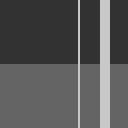

[[356352      0      0]
 [     0 356352      0]
 [     0      0  73728]]
Accuracy of KMeans Segmentation Image1:  100.0 %


In [13]:
k_input = 3
img = "/content/im5.tif"
im = Image.open(img)
img_width, img_height = im.size
px = im.load()
result = startKmeans(k_input)
drawWindow(result,"/content/im5KMEANS.tif" )
conf_matrix("/content/im5.tif", "/content/im5KMEANS.tif")

create centroids , classifying pixels 
converged
[(100, 100, 100), (50, 50, 50), (40, 40, 40), (170, 170, 170), (200, 200, 200), (90, 90, 90)]


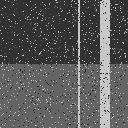

[[ 28299      0      0      0      0      0]
 [     0 313020      0      0      0      0]
 [     0      0  29682      0      0      0]
 [     0      0      0 312789      0      0]
 [     0      0      0      0  30822      0]
 [     0      0      0      0      0  71820]]
Accuracy of KMeans Segmentation Image1:  100.0 %


In [17]:
k_input = 6
img = "/content/im8.tif"
im = Image.open(img)
img_width, img_height = im.size
px = im.load()
result = startKmeans(k_input)
drawWindow(result,"/content/im8KMEANS.tif" )
conf_matrix("/content/im8.tif", "/content/im8KMEANS.tif")

## Apply the algorithm on the test gray level image that matches your group.


create centroids , classifying pixels 
converged
[(124, 124, 124), (118, 118, 118), (117, 117, 117), (126, 126, 126), (119, 119, 119), (100, 100, 100), (113, 113, 113), (123, 123, 123), (99, 99, 99), (107, 107, 107), (133, 133, 133), (102, 102, 102), (129, 129, 129), (134, 134, 134), (122, 122, 122), (120, 120, 120), (108, 108, 108), (109, 109, 109), (141, 141, 141), (145, 145, 145), (130, 130, 130), (84, 84, 84), (103, 103, 103), (149, 149, 149), (125, 125, 125), (137, 137, 137), (19, 19, 19), (95, 95, 95), (4, 4, 4), (88, 88, 88), (155, 155, 155), (97, 97, 97), (32, 32, 32), (143, 143, 143), (128, 128, 128), (132, 132, 132), (111, 111, 111), (121, 121, 121), (112, 112, 112), (127, 127, 127), (92, 92, 92), (114, 114, 114), (116, 116, 116), (8, 8, 8), (104, 104, 104), (142, 142, 142), (86, 86, 86), (64, 64, 64), (105, 105, 105), (11, 11, 11), (115, 115, 115), (140, 140, 140), (135, 135, 135), (106, 106, 106), (79, 79, 79), (144, 144, 144), (136, 136, 136), (139, 139, 139)]


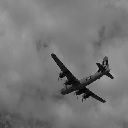

[[27 15  9 ...  0  0  0]
 [12  0  0 ...  0  0  0]
 [ 6  6 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
Accuracy of KMeans Segmentation Image1:  76.09 %


In [18]:
k_input = 120
img = "/content/gray.jpg"
im = Image.open(img)
img_width, img_height = im.size
px = im.load()
result = startKmeans(k_input)
drawWindow(result,"/content/grayKMeans.jpg" )
conf_matrix("/content/gray.jpg", "/content/grayKMeans.jpg")

###  Apply the algorithm on the test colored image that matches your group.


create centroids , classifying pixels 
converged
[(40, 69, 103), (105, 112, 125), (123, 126, 135), (112, 118, 130), (141, 140, 146), (109, 116, 132), (157, 155, 159), (116, 121, 120), (112, 116, 127), (113, 118, 126), (109, 115, 129), (99, 104, 104), (135, 135, 141), (101, 110, 126), (119, 123, 134), (96, 107, 125), (116, 121, 132), (136, 135, 147), (133, 133, 143), (129, 131, 142), (125, 128, 137), (131, 131, 141), (144, 143, 153), (117, 122, 137), (138, 138, 144), (140, 139, 145), (134, 134, 145), (133, 134, 139), (111, 117, 131), (114, 120, 135), (126, 126, 137), (132, 132, 138), (107, 113, 128), (131, 133, 145), (112, 118, 133), (144, 143, 148), (120, 124, 133), (85, 98, 120), (133, 138, 133), (107, 114, 125), (140, 139, 149), (127, 129, 141), (110, 117, 128), (124, 124, 135), (109, 114, 115), (118, 122, 134), (136, 136, 141), (58, 65, 58), (103, 109, 125), (100, 107, 123), (104, 112, 128), (122, 125, 137), (128, 128, 138), (137, 137, 142), (64, 83, 110), (119, 120, 133), (127, 130

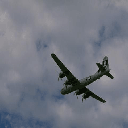

[[117  41  49 ...   0   0   0]
 [ 15   9   7 ...   0   0   0]
 [ 22  12  15 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Accuracy of KMeans Segmentation Image1:  50.5 %


In [19]:
k_input = 150
img = "/content/DLCV.jpg"
im = Image.open(img)
img_width, img_height = im.size
px = im.load()
result = startKmeans(k_input)
drawWindow(result,"/content/DLCVKMeans.jpg" )
conf_matrix("/content/DLCV.jpg", "/content/DLCVKMeans.jpg")

### Implement the EM algorithm as instructed in the lecture slides. 


In [0]:
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from scipy import misc
from sklearn.cluster import KMeans
from sklearn import preprocessing as pre

In [0]:
def logsumexp(X):
    x_max = X.max(1)
    return x_max + np.log(np.exp(X - x_max[:, None]).sum(1))

In [0]:
#We use k-means to compute rough cluster centers and mixture weights.

CONVERGENCE_THRESHOLD = 100

def EM(X, img_name, W, H, center, scale):    
    plt_num = 1

    estimators = {'k_means_150': KMeans(n_clusters=150)}
    
    for name, est in estimators.items():
        print(name)
        J = int(name[8:])
        NUM_PIXELS = X.shape[0]
        
        # perform k means
        est.fit(X)
        segments_id = est.labels_
        
        # get initial cluster centers/ means from k-means
        means = est.cluster_centers_
        
        # get initial pi from k-means
        pi = np.array([np.sum(segments_id == i) for i in range(J)])
        pi = pi / float(NUM_PIXELS)

        print("check there are no zero values in pi", 0 not in pi)
        
        ### EM ###
        prev_Q = sys.maxsize
        list_of_q = []
        
        while True:
            
            ## E-Step ##
            ll = np.zeros((NUM_PIXELS, J))
            for j in range(J):
                ll[:,j] = -0.5 * np.sum((X - means[j,])**2, 1)
            
            # compute w_ij
            w = np.exp(ll) @ np.diag(pi)
            w = (w.T / np.sum(w,1)).T
            
            # compute Q without constant K
            Q = np.sum(ll * w)
            list_of_q.append(Q)
            
            # check for convergence
            if abs(Q - prev_Q) <= CONVERGENCE_THRESHOLD:
                break
            else:
                prev_Q = Q
            
            ## M-Step ##
            
            # update means
            for j in range(J):
                means[j,] = np.sum((X.T * w[:,j]).T, 0) / np.sum(w[:,j])

            # update pi
            pi = np.sum(w, 0)/ NUM_PIXELS
            
        # display result as segmented image
        segmented_img_rgb = np.zeros((H, W, 3), dtype=np.uint8)
        for i in range(H):
            for j in range(W):
                idx = (i-1) * W + j
                pixel = X[idx,]
                pixel_segment_id = np.argmax(w[idx,])
                segmented_img_rgb[i,j,] = means[pixel_segment_id,] * scale + center
        
        plt.figure(plt_num)
        plt.imshow(segmented_img_rgb) # show segmented image
        plt.show()
        plt_num += 1
        segmented_img_rgb = Image.fromarray(segmented_img_rgb, 'RGB')
        segmented_img_rgb.save(img_name) # save segmented image

k_means_150
check there are no zero values in pi True


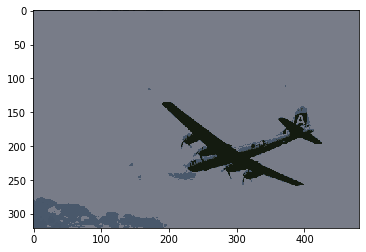

In [46]:
# read data
import imageio
goby_img = imageio.imread('/content/DLCV.jpg')
(H, W, N) = goby_img.shape
data = goby_img.reshape((H * W, N))
data_centers = np.mean(data, 0)
data_scale = np.std(data, 0)
data = pre.scale(data)

# run EM
EM(data, '/content/DLCVEM.jpg',W, H, data_centers, data_scale)

In [47]:
conf_matrix("/content/DLCV.jpg", "/content/DLCVEM.jpg")

[[0 1 1 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy of KMeans Segmentation Image1:  3.66 %


### Alternative to problem 3 using K-means algorithm.
Load the hyperspectral image and the segmentation ground truth saved in .mat
files according to your group


In [0]:
from scipy.io import loadmat
#load hyperspectral images
q4 = loadmat('/content/SalinasA_Q4.mat')
hyperspectralData = q4['Q4']
#load the ground truth
gt = loadmat('/content/SalinasA_GT4.mat')
gtData = gt['Q4_GT']

Reshape the image to be one vector of pixels where each pixel has 204
subbands. 

In [0]:
from sklearn.cluster import KMeans
dataFlattened = hyperspectralData.reshape((hyperspectralData.shape[0]*hyperspectralData.shape[1],hyperspectralData.shape[2]))
import matplotlib
matplotlib.image.imsave('/content/hyperspectral.jpg', dataFlattened)
#Do the same for ground truth
gtFlattened = gtData.flatten()

Apply the k-means algorithm on this images. The image contain 7 classes in total.

Test the accuracy of the algorithm using the ground truth MAT file associated.
Report the results in a confusion matrix. 

create centroids , classifying pixels 
converged
[(124, 206, 80), (35, 138, 139), (52, 94, 140), (68, 7, 90), (65, 62, 131), (71, 39, 119), (71, 21, 104)]


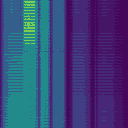

In [80]:
k_input = 7
img = "/content/hyperspectral.jpg"
im = Image.open(img)
img_width, img_height = im.size
px = im.load()
result = startKmeans(k_input)
drawWindow(result,"/content/hyperspectralKMEANS.jpg" )

In [91]:
conf_matrix("/content/hyperspectral.jpg", "/content/hyperspectralKMEANS.jpg")

array([[749,   0,   0,   0,   0],
[198, 153,  77,   0,   0],
[  0,   8, 100,   0,   0],
[161,   0,   0,   0,   0],
[  0, 287,   30,   0,   0]], dtype=int64)
Accuracy of KMeans Segmentation Image1:  56.83 %
